In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from aif360.datasets import StructuredDataset
from aif360.metrics import DatasetMetric
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.algorithms.preprocessing import Reweighing
from aif360.metrics import ClassificationMetric

In [5]:
credit = pd.read_csv('../GiveMeSomeCredit/cs-training.csv',index_col=0 )

In [6]:
credit.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [10]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [14]:
credit['age'].value_counts()

49     3837
48     3806
50     3753
63     3719
47     3719
       ... 
101       3
109       2
107       1
105       1
0         1
Name: age, Length: 86, dtype: int64

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.830e+02, 4.340e+02, 6.410e+02, 1.769e+03, 1.193e+03,
        1.338e+03, 1.560e+03, 1.702e+03, 1.937e+03, 2.038e+03, 2.050e+03,
        2.239e+03, 2.155e+03, 2.246e+03, 4.900e+03, 2.631e+03, 2.987e+03,
        3.093e+03, 3.122e+03, 3.082e+03, 3.208e+03, 3.294e+03, 3.502e+03,
        3.714e+03, 3.719e+03, 7.643e+03, 3.753e+03, 3.627e+03, 3.609e+03,
        3.648e+03, 3.561e+03, 3.416e+03, 3.589e+03, 3.375e+03, 3.443e+03,
        3.280e+03, 6.780e+03, 3.568e+03, 3.719e+03, 3.058e+03, 2.594e+03,
        2.494e+03, 2.503e+03, 2.235e+03, 1.954e+03, 1.777e+03, 1.646e+03,
        3.169e+03, 1.451e+03, 1.241e+03, 1.183e+03, 1.099e+03, 1.054e+03,
        9.810e+02, 8.760e+02, 7.740e+02, 6.470e+02, 5.120e+02, 9.630e+02,
        4.070e+02, 3.570e+02, 3.130e+0

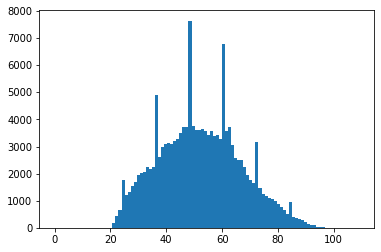

In [72]:
plt.hist(credit['age'], bins=100)

In [94]:
new_credit = credit.dropna()

In [95]:
new_credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120269 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      120269 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  120269 non-null  float64
 2   age                                   120269 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  120269 non-null  int64  
 4   DebtRatio                             120269 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       120269 non-null  int64  
 7   NumberOfTimes90DaysLate               120269 non-null  int64  
 8   NumberRealEstateLoansOrLines          120269 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  120269 non-null  int64  
 10  NumberOfDependents                    120269 non-null  float64
dtype

## Is there a bias against people who are under 25? 

In [96]:
new_credit['age'] = new_credit['age'].transform(lambda x: x >= 25).astype(int)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [97]:
new_credit.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,1,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,1,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,1,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,1,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,1,1,0.024926,63588.0,7,0,1,0,0.0


In [98]:
new_credit['age'].value_counts()

1    118642
0      1627
Name: age, dtype: int64

In [28]:
sd = StructuredDataset(new_credit,label_names=['SeriousDlqin2yrs'], protected_attribute_names=['age'] )

In [30]:
#data_train, data_val = sd.split([0.7], shuffle=True)

In [99]:
u = [{'age': 0}]
p = [{'age': 1}]




In [100]:
bl = BinaryLabelDataset(favorable_label=0, unfavorable_label=1, df=new_credit ,label_names=['SeriousDlqin2yrs'], protected_attribute_names=['age']) 



In [102]:
metric_train = BinaryLabelDatasetMetric(data_train, 
                            unprivileged_groups=u, 
                            privileged_groups=p)

In [101]:
data_train, data_val = bl.split([0.7], shuffle=True)

In [103]:
metric_train.mean_difference()

-0.03126096534406608

In [104]:
metric_train.disparate_impact()

0.9664222243475828

In [105]:
RW = Reweighing(unprivileged_groups=u, 
               privileged_groups=p)

In [106]:
data_transf_train = RW.fit_transform(data_train)

In [62]:
metric_transf_train = BinaryLabelDatasetMetric(data_transf_train, 
                                             unprivileged_groups=u, 
                                            privileged_groups=p)

In [107]:
metric_transf_train.mean_difference()

0.0

In [68]:
data_transf_train

               instance weights                             features  \
                                                                       
                                RevolvingUtilizationOfUnsecuredLines   
instance names                                                         
6382                   0.999624                             0.658606   
56652                  0.999624                             0.056353   
1533                   0.999624                             0.831214   
32644                  0.999624                             0.895944   
105697                 0.999624                             0.046540   
...                         ...                                  ...   
30885                  0.999624                             0.661930   
63483                  0.999624                             0.784334   
74476                  0.999624                             0.328989   
75438                  0.999624                             0.02

## Is there a bias for people with more than 2 dependents? 

In [110]:
depend_credit = credit.dropna()

In [111]:
depend_credit['NumberOfDependents'] = new_credit['NumberOfDependents'].transform(lambda x: x <= 2).astype(int)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [115]:
u = [{'NumberOfDependents': 0}]
p = [{'NumberOfDependents': 1}]

In [113]:
bl_depend = BinaryLabelDataset(favorable_label=0, unfavorable_label=1, df=depend_credit ,label_names=['SeriousDlqin2yrs'], protected_attribute_names=['NumberOfDependents']) 


In [121]:
data_train, data_val = bl_depend.split([0.7], shuffle=True)

In [122]:
metric_train = BinaryLabelDatasetMetric(data_train, 
                            unprivileged_groups=u, 
                            privileged_groups=p)

In [123]:
metric_train.mean_difference()

-0.028684375465851897

In [124]:
metric_train.disparate_impact()

0.9692719115872914